In [117]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [102]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\Train.csv")

In [103]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [104]:
df.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


KNN 
binary
understand the characteristic

In [105]:
# univariate analysis
# check data balance ,make sure it is balanced
df.groupby('Segmentation').count()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,,
A,1972,1972,1938,1972,1948,1939,1778,1972,1877,1953
B,1858,1858,1827,1858,1840,1836,1666,1858,1815,1845
C,1970,1970,1947,1970,1955,1952,1815,1970,1926,1949
D,2268,2268,2216,2268,2247,2217,1980,2268,2115,2245


In [106]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<Axes: xlabel='Family_Size', ylabel='Count'>

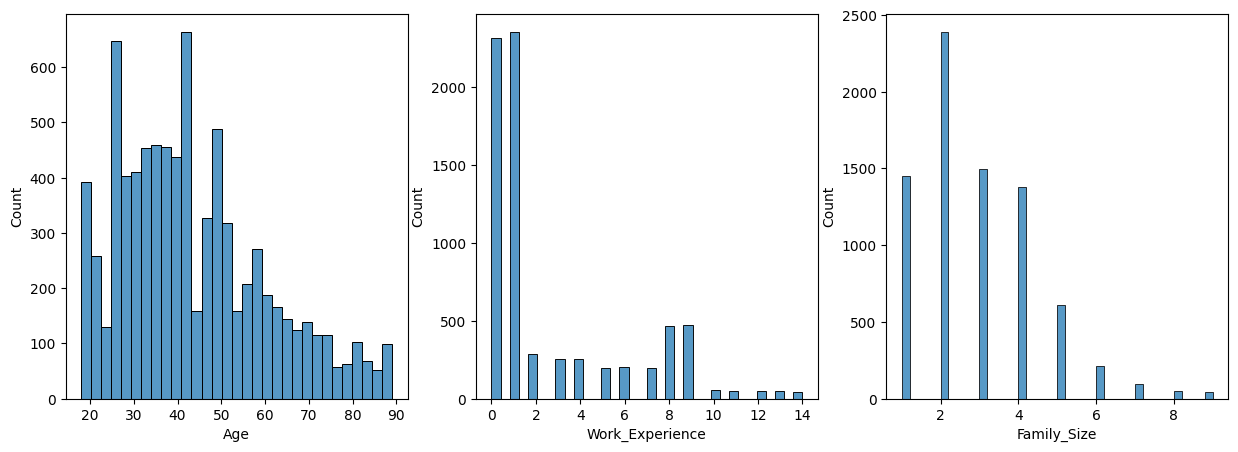

In [107]:
# check continours variables first,  age, work, experience, familly size
import matplotlib.pyplot as plt

# sublot to create multiple plots

# first, create the plot
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))

# define the content
sns.histplot(df['Age'], ax= ax1)
sns.histplot(df['Work_Experience'], ax= ax2)
sns.histplot(df['Family_Size'], ax= ax3)


<Axes: xlabel='Segmentation', ylabel='Family_Size'>

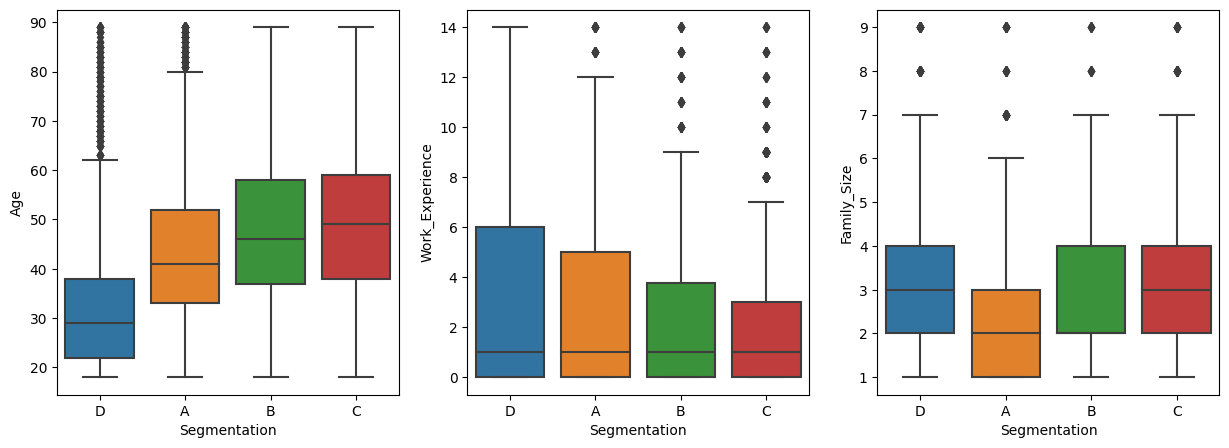

In [108]:
# for categorical and continuous variables
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))

# define the content
sns.boxplot(x= 'Segmentation', y ='Age', data= df, ax=ax1)
sns.boxplot(x= 'Segmentation', y ='Work_Experience', data= df, ax=ax2)
sns.boxplot(x= 'Segmentation', y ='Family_Size', data= df, ax=ax3)


Ini

In [109]:
df.groupby(['Gender','Segmentation'])['ID'].count().unstack()

Segmentation,A,B,C,D
Gender,,,,
Female,909,861,922,959
Male,1063,997,1048,1309


In [110]:
df.groupby(['Ever_Married','Segmentation'])['ID'].count().unstack()

Segmentation,A,B,C,D
Ever_Married,,,,
No,801,479,398,1607
Yes,1137,1348,1549,609


In [111]:
df.groupby(['Ever_Married','Segmentation'])['ID'].count()


Ever_Married  Segmentation
No            A                801
              B                479
              C                398
              D               1607
Yes           A               1137
              B               1348
              C               1549
              D                609
Name: ID, dtype: int64

In [112]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [113]:
df.groupby(['Graduated','Segmentation'])['ID'].count().unstack()

Segmentation,A,B,C,D
Graduated,,,,
No,729,508,348,1437
Yes,1219,1332,1607,810


In [114]:
df.groupby(['Spending_Score','Segmentation'])['ID'].count().unstack()

Segmentation,A,B,C,D
Spending_Score,,,,
Average,343,590,903,138
High,271,384,405,156
Low,1358,884,662,1974


In [115]:
for i in ['Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']:
print(df.groupby([i,'Segmentation'])['ID'].count().unstack())

IndentationError: expected an indented block after 'for' statement on line 1 (2816987736.py, line 3)

In [ ]:
df[df['Segmentation'] == 'D'].describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,2268.000000,2268,2216,2268.000000,2247,2217,1980.000000,2268,2115.000000,2245,2268
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,1
top,NaN,Male,No,NaN,No,Healthcare,NaN,Low,NaN,Cat_6,D
freq,NaN,1309,1607,NaN,1437,979,NaN,1974,NaN,1297,2268
mean,463380.026896,NaN,NaN,33.390212,NaN,NaN,3.021717,NaN,3.232624,NaN,NaN
std,2605.525629,NaN,NaN,15.680304,NaN,NaN,3.622962,NaN,1.693600,NaN,NaN
min,458985.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461069.750000,NaN,NaN,22.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463130.500000,NaN,NaN,29.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465733.250000,NaN,NaN,38.000000,NaN,NaN,6.000000,NaN,4.000000,NaN,NaN


In [ ]:
df[df['Segmentation'] == 'A'].describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,1972.000000,1972,1938,1972.000000,1948,1939,1778.000000,1972,1877.000000,1953,1972
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,1
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,A
freq,NaN,1063,1137,NaN,1219,558,NaN,1358,NaN,1213,1972
mean,463457.893002,NaN,NaN,44.924949,NaN,NaN,2.874578,NaN,2.439531,NaN,NaN
std,2585.220444,NaN,NaN,16.406909,NaN,NaN,3.603993,NaN,1.482015,NaN,NaN
min,458991.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461086.500000,NaN,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
50%,463559.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN
75%,465702.250000,NaN,NaN,52.000000,NaN,NaN,5.000000,NaN,3.000000,NaN,NaN


In [ ]:
df[df['Segmentation'] == 'B'].describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,1858.000000,1858,1827,1858.000000,1840,1836,1666.000000,1858,1815.000000,1845,1858
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,1
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,B
freq,NaN,997,1348,NaN,1332,756,NaN,884,NaN,1232,1858
mean,463520.253498,NaN,NaN,48.200215,NaN,NaN,2.378151,NaN,2.696970,NaN,NaN
std,2550.208040,NaN,NaN,14.806443,NaN,NaN,3.225626,NaN,1.408615,NaN,NaN
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461454.250000,NaN,NaN,37.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463479.500000,NaN,NaN,46.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN
75%,465737.500000,NaN,NaN,58.000000,NaN,NaN,3.750000,NaN,4.000000,NaN,NaN


In [ ]:
gender = pd.get_dummies(df['Gender'],dtype=int)

In [ ]:
gender

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
8063,0,1
8064,0,1
8065,1,0
8066,1,0


In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
Ever_Married = pd.get_dummies(df['Ever_Married'], dtype=int)
Ever_Married.rename(columns=({'Yes': 'Married', 'No':'Not_Married'}))


Graduated = pd.get_dummies(df['Graduated'], dtype=int)
Graduated.rename(columns=({'Yes': 'Graduated', 'No':'Graduated'}))
Profession = pd.get_dummies(df['Profession'],dtype=int)
Spending_score = pd.get_dummies(df['Spending_Score'],dtype=int)


,Graduated,Graduated
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8063,1,0
8064,1,0
8065,0,1
8066,0,1


In [ ]:
new_df = pd.concat([df[['Age','Work_Experience','Family_Size']],gender, Ever_Married, Graduated, Profession, Spending_score, df['Segmentation']], axis = 1)

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
knn = KNeighborsClassifier(50)
knn.fit(new_df.iloc[:,:21], new_df.iloc[:,:21])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
pred = knn.predict(new_df.iloc[:,:21])

In [ ]:
print(accuracy_score(pred, new_df.iloc[:,:21]))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [ ]:
df.groupby(['Spending_Score','Segmentation'])['ID'].count().unstack()

Segmentation,A,B,C,D
Spending_Score,,,,
Average,343,590,903,138
High,271,384,405,156
Low,1358,884,662,1974


In [ ]:
# Combine low value users which are in A & D into one category, and high value (B &C ) in another
def recategorization(x):
    if x == 'A':
        return 0
    elif x == 'D':
        return 0
    elif x == 'B':
        return 1
    elif x =='C':
        return 1

In [ ]:
new_df['Segmentation'] = new_df['Segmentation'].apply(recategorization)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(np.array(new_df.iloc[:,:21]), np.array(new_df.iloc[:,21]))
pred = knn.predict(np.array(new_df.iloc[:,:21]))
print(accuracy_score(pred, new_df.iloc[:,21]))
print(accuracy_score(pred, new_df.iloc[:,21]))
print(f1_score(pred, new_df.iloc[:,21]))
print(recall_score(pred, new_df.iloc[:,21]))
print(precision_score(pred, new_df.iloc[:,21]))

In [118]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
X_train, X_test, y_train, y_test = train_test_split(np.array(new_df.iloc[:,:21]), np.array(new_df.iloc[:,21]), test_size=0.2, random_state=123)

In [122]:
log.fit(X_test,y_test)
nb.fit(X_test,y_test)
knn.fit(X_test,y_test)
svc.fit(X_test,y_test)

pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7552742616033754
0.7372708757637474
0.7994486560992419
0.7168796234028244


In [123]:
pred_l_prob = log.predict_proba(X_test)

In [124]:
pred_l_prob

array([[0.10106508, 0.89893492],
       [0.07904072, 0.92095928],
       [0.34136232, 0.65863768],
       ...,
       [0.81468296, 0.18531704],
       [0.11051702, 0.88948298],
       [0.88414057, 0.11585943]])

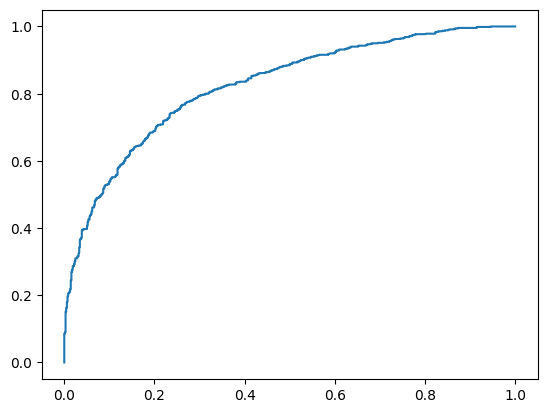

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])
plt.plot(fpr, tpr)


In [126]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans

array([0.        , 0.03779645, 0.15118579, 0.16903085, 0.24201535,
       0.24784788, 0.25634798, 0.26186147, 0.26726124, 0.27255406,
       0.27774603, 0.28284271, 0.28535692, 0.29032002, 0.29277002,
       0.29255902, 0.29978378, 0.29956741, 0.32025103, 0.3246685 ,
       0.33118423, 0.33545776, 0.35000441, 0.35405084, 0.36592175,
       0.36979404, 0.38489384, 0.38857712, 0.38829625, 0.40268244,
       0.40239096, 0.40415198, 0.4076512 , 0.41456103, 0.41797311,
       0.42303964, 0.42273298, 0.44240538, 0.44208421, 0.45159249,
       0.45126418, 0.45282836, 0.45249867, 0.45715572, 0.4568224 ,
       0.45989868, 0.4644749 , 0.46413574, 0.49067886, 0.49032005,
       0.49317908, 0.49602164, 0.50999681, 0.51274614, 0.51548081,
       0.5151033 , 0.52052559, 0.52014383, 0.52949248, 0.52910358,
       0.53042469, 0.53003453, 0.53528252, 0.53488821, 0.54265939,
       0.54225905, 0.54991485, 0.54869507, 0.55121782, 0.55372908,
       0.55290691, 0.55540312, 0.55788815, 0.56036217, 0.56117

In [127]:
thresholds[np.argmax(gmeans)]

0.5373221502198269

In [130]:
knn_params = {'n_neighbors':range(3,300)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=200, cv=10, scoring='f1')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_


SVC(kernel='linear')

In [131]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=10, scoring='f1')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

SVC(kernel='linear')

In [132]:
svc_best = SVC(kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=63)

svc_best.fit(X_train,y_train)
knn_best.fit(X_train,y_train)

pred_svc_best = svc_best.predict(X_test)
pred_knn_best = knn_best.predict(X_test)

print(f1_score(pred_svc_best, y_test))
print(f1_score(pred_knn_best, y_test))

0.7503526093088857
0.7309573724668065
